<a href="https://colab.research.google.com/github/AlxeverCodeX/git-github/blob/master/LogisticRegression%5BTRAIN_AND_PREDICT%5D_(Titanic_Dataset)part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving titanic_train.csv to titanic_train (3).csv


In [ ]:
train = pd.read_csv('titanic_train.csv')

In [ ]:

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


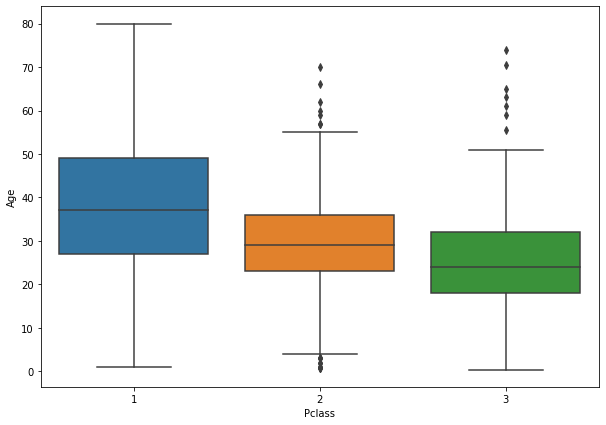

In [ ]:
#we want to fill in the missing data for the age column instead of just dropping them of
#one way to do this is by filling in the mean age of  all the passengers this is known as imputatin
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [ ]:
#simpe imputation(filling in) function
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24

  else:
    return Age



In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

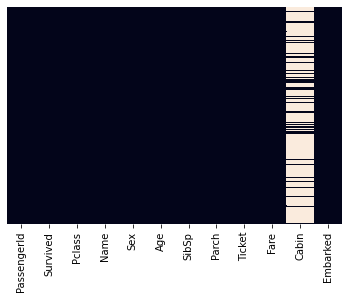

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [ ]:
#we have so many missing values in the cabin column so we have to drop it
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


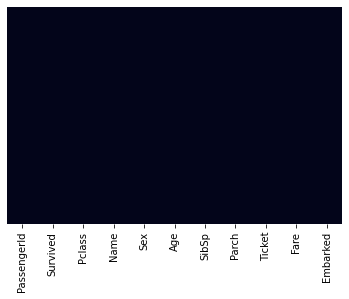

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [ ]:
#to drop any more missing values
train.dropna(inplace=True)

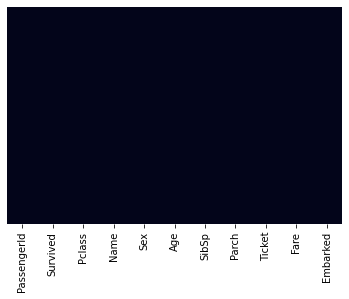

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [ ]:
#convert categorical feature into dummy variable for the machine learning algorith to understand
# we do pd.get_dummies() it convert categorical variable into dummy/indicator variables
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [ ]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [ ]:
#to add this new column sex,embarked  to our data frame we concatenate
train = pd.concat([train,sex,embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
#we drop columns we are not using pass it in as a list
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
#the output of this is going to show us the columns perfect for the machine learning algorithm
train.head(8)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,24.0,0,0,8.4583,1,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1


In [ ]:
#we have to drop the passenger  because its just an index starting from 1 we cant predit from it
train.drop('PassengerId',axis=1,inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
train.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,0,2,27.0,0,0,13.00,1,0,1
887,1,1,19.0,0,0,30.00,0,0,1
888,0,3,24.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


In [ ]:
#Pclass column is acually a categorical column meaning it can only have three dinstinct category 1,2 or 3 that means we could have converted it to dummy variable like we did before
# assignment work with it like this and predict then later you convert and predict to see the differnce


PART 3


In [94]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [95]:
# yis is the column you are trying to predict survied column
#x is features
x = train.drop('Survived',axis=1)
y = train['Survived']

In [97]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
logmodel = LogisticRegression()

In [112]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
#lets call some predictions from this using our xtest data set
predictions = logmodel.predict(X_test)

In [116]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [117]:
#confusion metrics
from sklearn.metrics import confusion_matrix

In [118]:
confusion_matrix(y_test,predictions)

array([[156,  28],
       [ 26,  84]])